In [68]:
#导入相关模块
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
#获取数据
mnist_data = fetch_openml('mnist_784',data_home="./datasets")
print(mnist_data)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [36]:
#处理数据特征与标签，均转换为数组
X=mnist_data.data
X=np.array(X)
y=mnist_data.target
y=np.array(y)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(-0.5, 27.5, 27.5, -0.5)

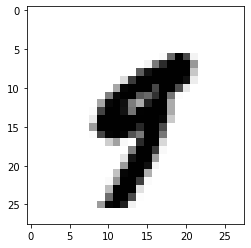

In [38]:
#随手抓取一个实例的特征向量，重新形成一个28×28数组，并可视化
digit_5 = X[36000]#第36000个实例
digit_5_image = digit_5.reshape(28, 28)
#可视化
plt.imshow(digit_5_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("on")

In [43]:
#数据集划分，训练集为60000，测试集为10000
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10000)
print(len(X_train))
print(len(X_test))

60000
10000


In [66]:
#定义KNN模型
KNmodel = KNeighborsClassifier(n_neighbors=3)
#训练KNN模型
KNmodel.fit(X_train,y_train)
#结果预测
y_predKN = KNmodel.predict(X_test)
#获取KNN模型五折交叉验证得分
KN_scores = cross_val_score(KNmodel, X_train, y_train, cv=5)

In [69]:
#输出模型评价指标
print('KNeighborsClassifier:\n  准确率: %.2f' % accuracy_score(y_test, y_predKN))
print("  KN_Scores:%s" %KN_scores)
print("  KN_mean_Score:",KN_scores.mean())

KNeighborsClassifier:
  准确率: 0.97
  KN_Scores:[0.97133333 0.97166667 0.97275    0.97158333 0.97116667]
  KN_mean_Score: 0.9717


In [70]:
#定义逻辑回归模型
LGmodel = LogisticRegression(C = 100.0, random_state=1)  
#训练LG模型
LGmodel.fit(X_train, y_train)
#结果预测
y_predLG = LGmodel.predict(X_test)  
#获取LG模型五折交叉验证得分
LG_scores = cross_val_score(LGmodel, X_train, y_train, cv=5)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [71]:
print('LogisticRegression:\n  准确率: %.2f' % accuracy_score(y_test, y_predLG))
print("  LG_Scores:%s" %LG_scores)
print("  LG_mean_Score:",LG_scores.mean())

LogisticRegression:
  准确率: 0.92
  LG_Scores:[0.92158333 0.91875    0.92375    0.91925    0.91675   ]
  LG_mean_Score: 0.9200166666666666


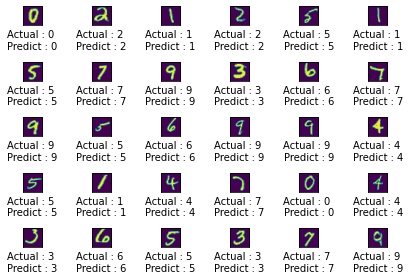

In [83]:
#测试KNN训练模型，并可视化预测结果
for i in range(30):
    plt.subplot(5,6, i+1)
    plt.xticks([])
    plt.yticks([])
    img = X_test[i+30]
    img = img.reshape(28, 28)
    plt.imshow(img)
    plt.xlabel('Actual : {} \nPredict : {}'.format(y_test[i+30], y_predKN[i+30]))
plt.tight_layout()
plt.show()

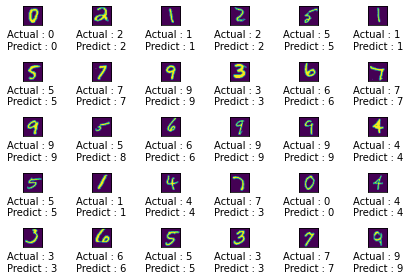

In [82]:
#测试LG训练模型，并可视化预测结果
for i in range(30):
    plt.subplot(5,6, i+1)
    plt.xticks([])
    plt.yticks([])
    img = X_test[i+30]
    img = img.reshape(28, 28)
    plt.imshow(img)
    plt.xlabel('Actual : {} \nPredict : {}'.format(y_test[i+30], y_predLG[i+30]))
plt.tight_layout()
plt.show()